In [62]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


In [63]:
# Load the data
df = pd.read_csv('data/only2_big_with_sf.csv')
# df = df.transpose()
df.set_index('cell_line', inplace=True)
# df = df.transpose()
display(df.head())

,7105,8813,57147,55732,2268,3075,2519,2729,4800,90529,...,8336,84311,126661,79447,283521,29122,9997,388963,6905,SF
cell_line,,,,,,,,,,,,,,,,,,,,,
NCIH1568-2,5.626439,6.855242,2.185867,4.079805,0.084064,0.176323,6.824513,4.956521,3.766595,2.298658,...,0.622930,5.373996,1.956057,5.482203,0.422233,0.176323,0.918386,1.778209,4.050502,0.607940
SCC9-2,3.964399,5.718088,2.260026,3.451541,0.084064,0.782409,6.039796,5.778734,4.903038,2.711495,...,1.536053,5.042207,2.344828,3.937344,0.000000,0.042644,2.475085,1.176323,4.174726,0.573035
HCC1428-2,4.002703,5.870365,3.621759,3.861955,0.014355,0.485427,4.614121,5.286881,4.429616,3.442280,...,3.033863,4.539159,1.970854,5.895303,0.622930,0.014355,0.918386,2.244887,5.555816,0.450188
U2OS-2,5.098453,6.543496,2.117695,4.115200,0.014355,0.432959,5.684258,4.847997,5.108524,2.189034,...,0.176323,5.028569,2.967169,4.995937,0.111031,0.042644,2.010780,1.925999,4.635754,0.526517
LU99-2,3.665620,6.716717,2.100978,4.176323,0.000000,1.263034,6.124948,4.395063,5.070389,2.669027,...,1.321928,6.613679,1.438293,4.349082,0.000000,0.111031,1.111031,1.632268,5.197315,0.625161


In [64]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_scaled_x = scaler.fit_transform(df[['653140', '30010', '90580', '4837', '1002', '89887', '54863', '57655', '7277', '199745', '6664', '27201', '64065', '10498', '51151', '4086', '57228', '9427', '257144', '85236', '1522', '2555', '129807', '63910', '3487', '126299', '10121', '11098', '136', '342918', '57787', '85416', '83439', '9507', '112770', '90861', '84627', '51115', '225', '3764', '3077', '23127', '51764', '120114', '1107', '51477', '799', '23170', '7755', '29941', '283869', '487', '84561', '4171', '53831', '192286', '84891', '79705', '2322', '5300', '91369', '1870', '440193', '1687', '57834', '83638', '54511', '22871', '83461', '84881', '64708', '160851', '81608', '1591', '132671', '126661', '57168', '90075', '960', '5609', '7329', '79669', '29855', '115761', '200916', '120379', '7049', '10054', '83983', '25959', '1893', '4858', '10135', '9411', '59335', '3425', '301', '22924', '23295', '23389', '54507', '57478', '9783', '547', '90853', '25822', '26135', '6695', '59271', '2850', '153657', '23259', '79134', '6383', '28316', '23316', '26353', '11264', '4233', '5653', '65993', '4986', '29126', '151887', '29998', '63035', '54926', '374875', '57414', '29948', '54014', '6136', '84443', '23181', '57689', '55074', '79841', '5340', '286205', '54921', '2876', '84662', '57451', '150684', '79690', '221336', '245972', '65249', '10672', '196', '90378', '9869', '79805', '389', '57216', '170261', '7262', '27324', '8645', '387885', '29105', '199731', '79664', '2124', '653857', '5207', '6619', '51773', '90416', '91801', '8288', '65217', '55486.1', '116412', '55138', '50839', '51222', '157313', '10189', '63897', '29965', '2256', '147138', '121340', '84197', '27239', '8228', '27286', '10397', '64168', '80312', '163126', '84206', '4771', '26065', '55166', '55214', '57472', '58480', '170685', '404550', '171484', '80790', '222553', '90121', '138162', '84275', '10343', '64241', '55857', '10023', '23348', '342977', '23354', '793', '339488', '8894', '57799', '4199', '10951', '324', '57007', '283464', '3104', '57585', '2512', '23331', '9873', '79169', '7846', '93550', '284358', '80164', '6925', '84986', '55766', '6689', '8277', '374739', '64073', '253980', '3029', '23179', '57158', '90826', '3575', '5734', '146923', '1608', '3646', '1337', '8165', '51496', '57552', '64859', '165', '2152', '91107', '84332', '134353', '2902', '885', '4257', '246175', '5451', '26022', '8829', '84269', '9169', '10413', '56034', '79813', '7045', '9200', '3222', '6330', '51364', '55623', '54665', '3241', '58512', '860', '92797', '79948', '84641', '284', '57465', '374946', '54704', '283248', '126295', '9242', '8347', '6899', '54708']])
# y_non_scaled = df['SF']

In [65]:
# df_scaled_x = pd.DataFrame(df_scaled_x, columns=['653140', '30010', '90580', '4837', '1002', '89887', '54863', '57655', '7277', '199745', '6664', '27201', '64065', '10498', '51151', '4086', '57228', '9427', '257144', '85236', '1522', '2555', '129807', '63910', '3487', '126299', '10121', '11098', '136', '342918', '57787', '85416', '83439', '9507', '112770', '90861', '84627', '51115', '225', '3764', '3077', '23127', '51764', '120114', '1107', '51477', '799', '23170', '7755', '29941', '283869', '487', '84561', '4171', '53831', '192286', '84891', '79705', '2322', '5300', '91369', '1870', '440193', '1687', '57834', '83638', '54511', '22871', '83461', '84881', '64708', '160851', '81608', '1591', '132671', '126661', '57168', '90075', '960', '5609', '7329', '79669', '29855', '115761', '200916', '120379', '7049', '10054', '83983', '25959', '1893', '4858', '10135', '9411', '59335', '3425', '301', '22924', '23295', '23389', '54507', '57478', '9783', '547', '90853', '25822', '26135', '6695', '59271', '2850', '153657', '23259', '79134', '6383', '28316', '23316', '26353', '11264', '4233', '5653', '65993', '4986', '29126', '151887', '29998', '63035', '54926', '374875', '57414', '29948', '54014', '6136', '84443', '23181', '57689', '55074', '79841', '5340', '286205', '54921', '2876', '84662', '57451', '150684', '79690', '221336', '245972', '65249', '10672', '196', '90378', '9869', '79805', '389', '57216', '170261', '7262', '27324', '8645', '387885', '29105', '199731', '79664', '2124', '653857', '5207', '6619', '51773', '90416', '91801', '8288', '65217', '55486.1', '116412', '55138', '50839', '51222', '157313', '10189', '63897', '29965', '2256', '147138', '121340', '84197', '27239', '8228', '27286', '10397', '64168', '80312', '163126', '84206', '4771', '26065', '55166', '55214', '57472', '58480', '170685', '404550', '171484', '80790', '222553', '90121', '138162', '84275', '10343', '64241', '55857', '10023', '23348', '342977', '23354', '793', '339488', '8894', '57799', '4199', '10951', '324', '57007', '283464', '3104', '57585', '2512', '23331', '9873', '79169', '7846', '93550', '284358', '80164', '6925', '84986', '55766', '6689', '8277', '374739', '64073', '253980', '3029', '23179', '57158', '90826', '3575', '5734', '146923', '1608', '3646', '1337', '8165', '51496', '57552', '64859', '165', '2152', '91107', '84332', '134353', '2902', '885', '4257', '246175', '5451', '26022', '8829', '84269', '9169', '10413', '56034', '79813', '7045', '9200', '3222', '6330', '51364', '55623', '54665', '3241', '58512', '860', '92797', '79948', '84641', '284', '57465', '374946', '54704', '283248', '126295', '9242', '8347', '6899', '54708'])
display(y_non_scaled.head())

cell_line
NCIH1568-2    0.607940
SCC9-2        0.573035
HCC1428-2     0.450188
U2OS-2        0.526517
LU99-2        0.625161
Name: SF, dtype: float64

In [66]:
X, y = df[['653140', '30010', '90580', '4837', '1002', '89887', '54863', '57655', '7277', '199745', '6664', '27201', '64065', '10498', '51151', '4086', '57228', '9427', '257144', '85236', '1522', '2555', '129807', '63910', '3487', '126299', '10121', '11098', '136', '342918', '57787', '85416', '83439', '9507', '112770', '90861', '84627', '51115', '225', '3764', '3077', '23127', '51764', '120114', '1107', '51477', '799', '23170', '7755', '29941', '283869', '487', '84561', '4171', '53831', '192286', '84891', '79705', '2322', '5300', '91369', '1870', '440193', '1687', '57834', '83638', '54511', '22871', '83461', '84881', '64708', '160851', '81608', '1591', '132671', '126661', '57168', '90075', '960', '5609', '7329', '79669', '29855', '115761', '200916', '120379', '7049', '10054', '83983', '25959', '1893', '4858', '10135', '9411', '59335', '3425', '301', '22924', '23295', '23389', '54507', '57478', '9783', '547', '90853', '25822', '26135', '6695', '59271', '2850', '153657', '23259', '79134', '6383', '28316', '23316', '26353', '11264', '4233', '5653', '65993', '4986', '29126', '151887', '29998', '63035', '54926', '374875', '57414', '29948', '54014', '6136', '84443', '23181', '57689', '55074', '79841', '5340', '286205', '54921', '2876', '84662', '57451', '150684', '79690', '221336', '245972', '65249', '10672', '196', '90378', '9869', '79805', '389', '57216', '170261', '7262', '27324', '8645', '387885', '29105', '199731', '79664', '2124', '653857', '5207', '6619', '51773', '90416', '91801', '8288', '65217', '55486.1', '116412', '55138', '50839', '51222', '157313', '10189', '63897', '29965', '2256', '147138', '121340', '84197', '27239', '8228', '27286', '10397', '64168', '80312', '163126', '84206', '4771', '26065', '55166', '55214', '57472', '58480', '170685', '404550', '171484', '80790', '222553', '90121', '138162', '84275', '10343', '64241', '55857', '10023', '23348', '342977', '23354', '793', '339488', '8894', '57799', '4199', '10951', '324', '57007', '283464', '3104', '57585', '2512', '23331', '9873', '79169', '7846', '93550', '284358', '80164', '6925', '84986', '55766', '6689', '8277', '374739', '64073', '253980', '3029', '23179', '57158', '90826', '3575', '5734', '146923', '1608', '3646', '1337', '8165', '51496', '57552', '64859', '165', '2152', '91107', '84332', '134353', '2902', '885', '4257', '246175', '5451', '26022', '8829', '84269', '9169', '10413', '56034', '79813', '7045', '9200', '3222', '6330', '51364', '55623', '54665', '3241', '58512', '860', '92797', '79948', '84641', '284', '57465', '374946', '54704', '283248', '126295', '9242', '8347', '6899', '54708']], df['SF']
X.head()

,653140,30010,90580,4837,1002,89887,54863,57655,7277,199745,...,284,57465,374946,54704,283248,126295,9242,8347,6899,54708
cell_line,,,,,,,,,,,,,,,,,,,,,
NCIH1568-2,0.000000,0.014355,3.565597,6.705978,0.815575,2.432959,2.746313,4.860466,6.981967,1.996389,...,2.419539,2.427606,0.014355,2.956057,0.464668,2.157044,0.014355,2.032101,0.454176,4.500802
SCC9-2,0.070389,0.000000,3.504620,7.943921,2.392317,1.618239,1.378512,4.681449,7.965092,1.646163,...,3.976364,2.419539,0.000000,4.510329,0.565597,2.266037,2.742006,3.465974,3.204767,4.682011
HCC1428-2,0.070389,0.097611,3.854993,0.298658,0.189034,2.636915,1.687061,4.897724,5.009437,3.317594,...,0.863938,3.640390,0.137504,3.828835,2.632268,2.543496,0.014355,5.305241,3.012569,5.545968
U2OS-2,0.000000,0.097611,3.539779,7.319130,3.838952,1.906891,3.778209,5.103498,4.709842,2.831877,...,0.124328,3.708187,1.321928,3.758090,2.195348,1.669027,0.286881,6.401733,0.111031,4.827311
LU99-2,0.111031,0.000000,3.582556,1.744161,3.204767,2.972693,5.134632,5.094658,2.687061,0.895303,...,0.250962,2.620586,0.014355,4.500802,0.765535,1.748461,0.111031,1.843984,0.163499,4.993674


In [67]:
# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.1, random_state = 123)


In [68]:
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = train_X, label = train_y)
test_dmatrix = xg.DMatrix(data = test_X, label = test_y)


In [69]:
# Parameter dictionary specifying base learner
param = {'colsample_bytree': 0.3, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [70]:
%%time
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)


[14:50:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


CPU times: total: 266 ms
Wall time: 15.6 ms


In [71]:
# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.196472


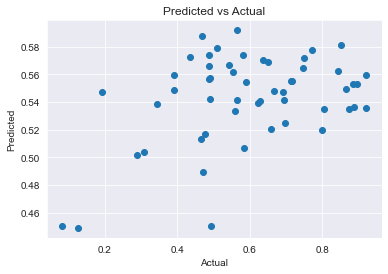

In [72]:
# Plotting the results
import matplotlib.pyplot as plt
plt.plot(test_y, pred, 'o')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()

Slope: 0.06602306690078256
Intercept: 0.5037656796270665
R-Squared: 0.17011816572257393
P-Value: 0.0021477868554252927
Standard Error: 0.020419419416317013


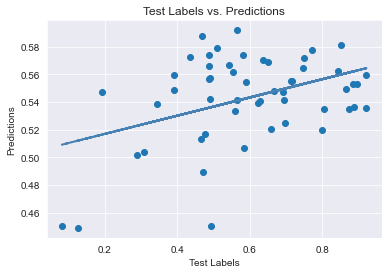

In [73]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
# print(y_test.tolist())
# print(y_pred_list)
plt.plot(test_y.tolist(), pred, 'o')

a, b = np.polyfit(test_y.tolist(), pred, 1)
plt.plot(test_y, a*test_y+b, color='steelblue', linestyle='--', linewidth=2)
slope, intercept, r_value, p_value, std_err = stats.linregress(test_y, pred)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()